# Trabajo Práctico 1
## Análisis Exploratorio

### Richter's Predictor: Modeling Earthquake Damage

### Mauricio Rodríguez Bertella

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
labels = pd.read_csv("/home/mauricio/Documents/Datos/Tp1RichterPredictor/train_labels.csv",
                    dtype = {'damage_grade':'category'})
values = pd.read_csv("/home/mauricio/Documents/Datos/Tp1RichterPredictor/cleaned_train.csv")

In [3]:
values.columns.to_list()

['building_id',
 'damage_grade',
 'geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'legal_ownership_status',
 'count_families',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_sec

In [4]:
values.size

10424040

In [5]:
values.index

RangeIndex(start=0, stop=260601, step=1)

## Cantidad de Pisos por Edificio %

In [6]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [7]:
cant_pisos_por_ed = values.loc[:,["count_floors_pre_eq"]]\
.value_counts(normalize=True)

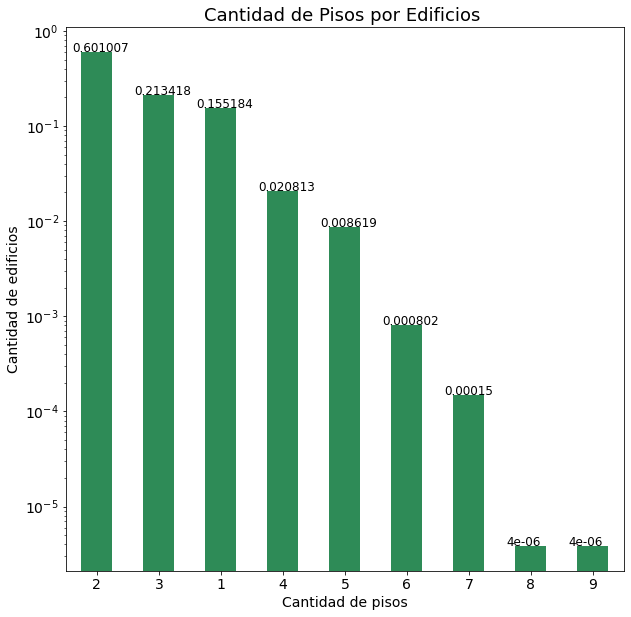

In [8]:
ax = cant_pisos_por_ed.plot.bar(log=True,color='seagreen',rot=0,figsize=(10,10),fontsize=14)
ax.set_ylabel('Cantidad de edificios',fontsize=14)
ax.set_xlabel('Cantidad de pisos',fontsize=14)
ax.set_title('Cantidad de Pisos por Edificios ',fontsize=18)
#ax.set_facecolor("lightgreen")

bar_labels = cant_pisos_por_ed.values
for index, bar in enumerate(bar_labels):
    ax.text(index-0.4, bar, str(round(bar,6)),fontsize=12)
    
x_labels = values.count_floors_pre_eq.drop_duplicates().values
ax.set_xticklabels(x_labels)
plt.show()

## Tipo de Daño segun Cantidad de Pisos

In [9]:
daño_cant_pisos = values.loc[:,["building_id","count_floors_pre_eq"]]\
.merge(labels,on="building_id",how='inner')\
.loc[:,["damage_grade","count_floors_pre_eq"]]
#daño_cant_pisos = pd.pivot_table(daño_cant_pisos,index="count_floors_pre_eq",columns="damage_grade",aggfunc='count')
daño_cant_pisos['aux'] = 1
daño_cant_pisos = daño_cant_pisos.pivot_table(index='count_floors_pre_eq'\
                        ,columns='damage_grade',values='aux',aggfunc='count')


# twilight_r,mako,blues,greens

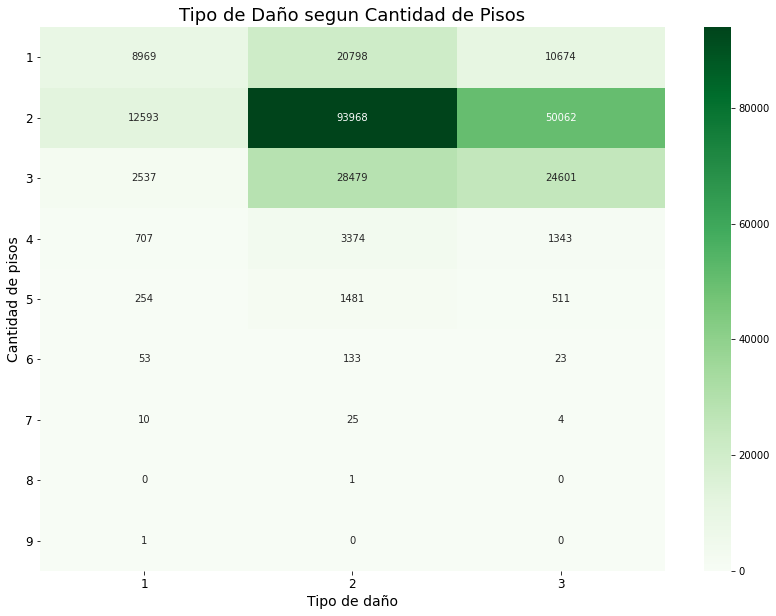

In [10]:
fig, ax = plt.subplots(figsize=(14,10)) 
p1 = sns.heatmap(daño_cant_pisos,annot=True,cmap='Greens',fmt='d')
#annot true por defecto pone el formato en cientifico
ax.set_ylabel('Cantidad de pisos',fontsize=14)
ax.set_xlabel('Tipo de daño',fontsize=14)
ax.set_title('Tipo de Daño segun Cantidad de Pisos',fontsize=18)

y_labels = daño_cant_pisos.index
x_labels = daño_cant_pisos.columns
aux = ax.set_yticklabels(y_labels,rotation=0,fontsize=12)
aux = ax.set_xticklabels(x_labels,fontsize=12)

## Top Usos Construcciones

In [11]:
has_columns = ['has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other']

In [12]:
tizzi = values.loc[:,has_columns].sum()
tizzi = tizzi.to_frame().rename(columns={0:"Amount"}) 

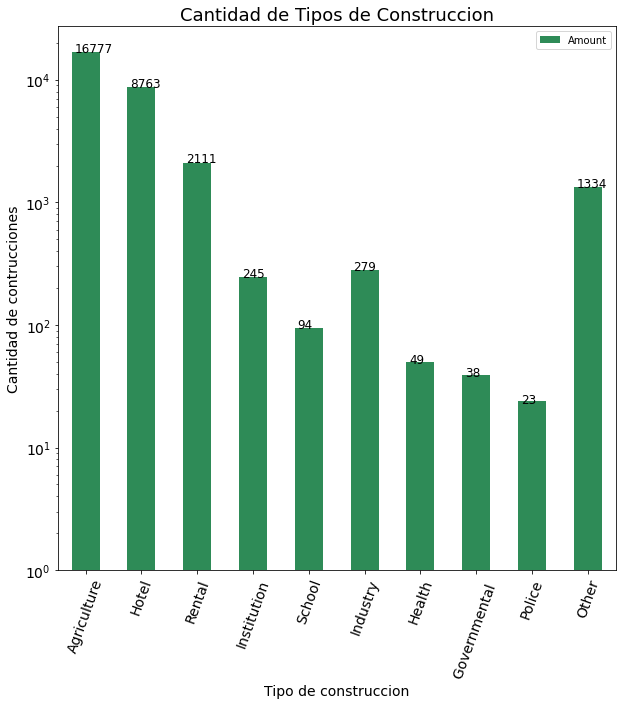

In [13]:
ax = tizzi.plot.bar(log=True,color='seagreen',rot=70,figsize=(10,10),fontsize=14)
ax.set_ylabel('Cantidad de contrucciones',fontsize=14)
ax.set_xlabel('Tipo de construccion',fontsize=14)
ax.set_title('Cantidad de Tipos de Construccion',fontsize=18)
#ax.set_facecolor("lightgreen")

bar_labels = tizzi.values
for index, bar in enumerate(bar_labels):
    ax.text(index-0.2, bar, int(bar),fontsize=12)
    
    
x_labels = ['Agriculture', 'Hotel', 'Rental', 'Institution', 'School', 'Industry', 'Health',
 'Governmental ', 'Police', 'Other']
ax.set_xticklabels(x_labels)
plt.show()

## 

# Material más afectado por terremotos

In [14]:
['foundation_type',
 'roof_type',
 'ground_floor_type']

['foundation_type', 'roof_type', 'ground_floor_type']

## Foundation

In [15]:
foundation_type = values.loc[:,['building_id','foundation_type']].merge(labels,on='building_id',how='inner')\
.pivot_table(index='foundation_type',columns='damage_grade',values='building_id',aggfunc='count')
for i in range (len(foundation_type)):
    foundation_type.iloc[i] = foundation_type.iloc[i]/(foundation_type.iloc[i].sum())


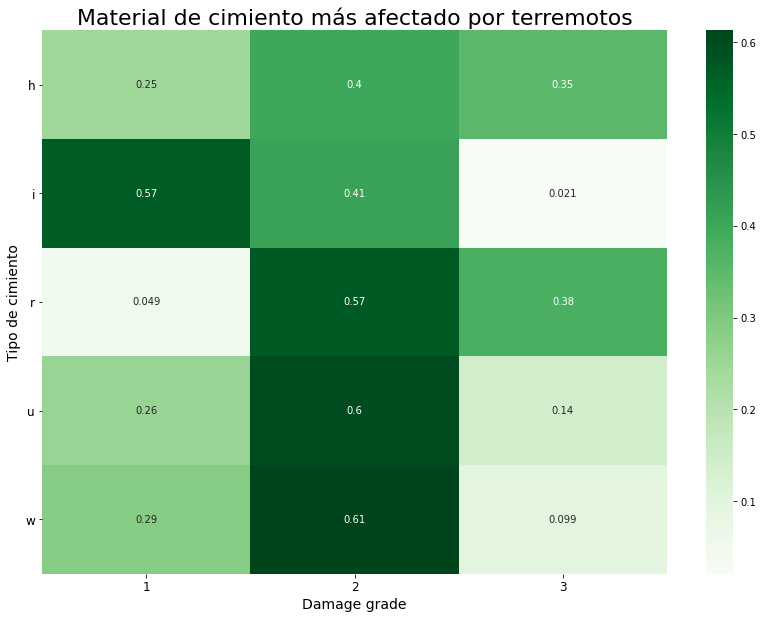

In [16]:
fig, ax = plt.subplots(figsize=(14,10)) 
p1 = sns.heatmap(foundation_type,cmap='Greens',annot=True)
#annot true por defecto pone el formato en cientifico
ax.set_ylabel('Tipo de cimiento',fontsize=14)
ax.set_xlabel('Damage grade',fontsize=14)
ax.set_title('Material de cimiento más afectado por terremotos',fontsize=22)

y_labels = foundation_type.index
x_labels = foundation_type.columns
aux = ax.set_yticklabels(y_labels,rotation=0,fontsize=12)
aux = ax.set_xticklabels(x_labels,fontsize=12)
fig.savefig("foundation_damage.png")

## Roof

In [17]:
roof_type = values.loc[:,['building_id','roof_type']].merge(labels,on='building_id',how='inner')\
.pivot_table(index='roof_type',columns='damage_grade',values='building_id',aggfunc='count')
for i in range (len(roof_type)):
    roof_type.iloc[i] = roof_type.iloc[i]/(roof_type.iloc[i].sum())


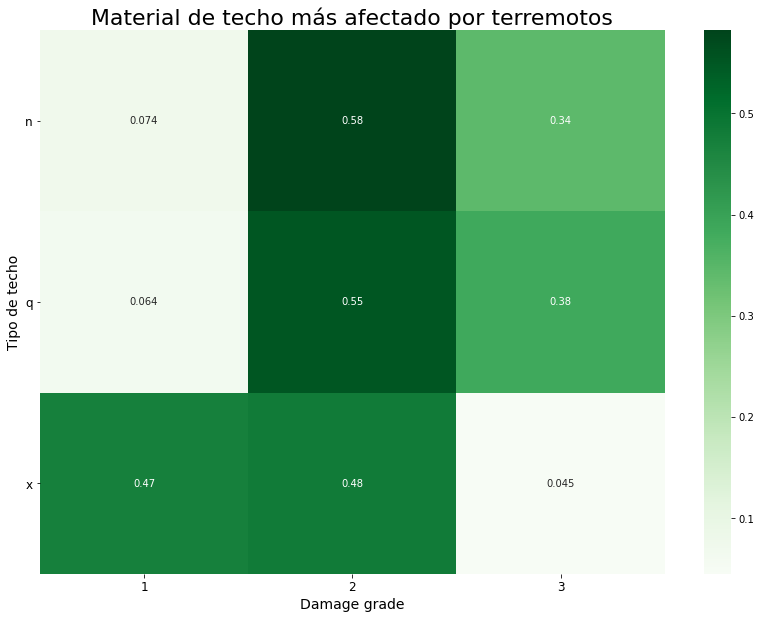

In [18]:
fig, ax = plt.subplots(figsize=(14,10)) 
p1 = sns.heatmap(roof_type,cmap='Greens',annot=True)
#annot true por defecto pone el formato en cientifico
ax.set_ylabel('Tipo de techo',fontsize=14)
ax.set_xlabel('Damage grade',fontsize=14)
ax.set_title('Material de techo más afectado por terremotos',fontsize=22)

y_labels = roof_type.index
x_labels = roof_type.columns
aux = ax.set_yticklabels(y_labels,rotation=0,fontsize=12)
aux = ax.set_xticklabels(x_labels,fontsize=12)
fig.savefig("roof_damage.png")


plt.gca().invert_yaxis()### Richter's Predictor: Modeling Earthquake Damage

## Ground

In [19]:
ground_type = values.loc[:,['building_id','ground_floor_type']].merge(labels,on='building_id',how='inner')\
.pivot_table(index='ground_floor_type',columns='damage_grade',values='building_id',aggfunc='count')
for i in range (len(ground_type)):
    ground_type.iloc[i] = ground_type.iloc[i]/(ground_type.iloc[i].sum())
ground_type



damage_grade,1,2,3
ground_floor_type,,,
f,0.060,0.572,0.369
m,0.177,0.675,0.148
v,0.419,0.527,0.053
x,0.082,0.584,0.333
z,0.198,0.530,0.272


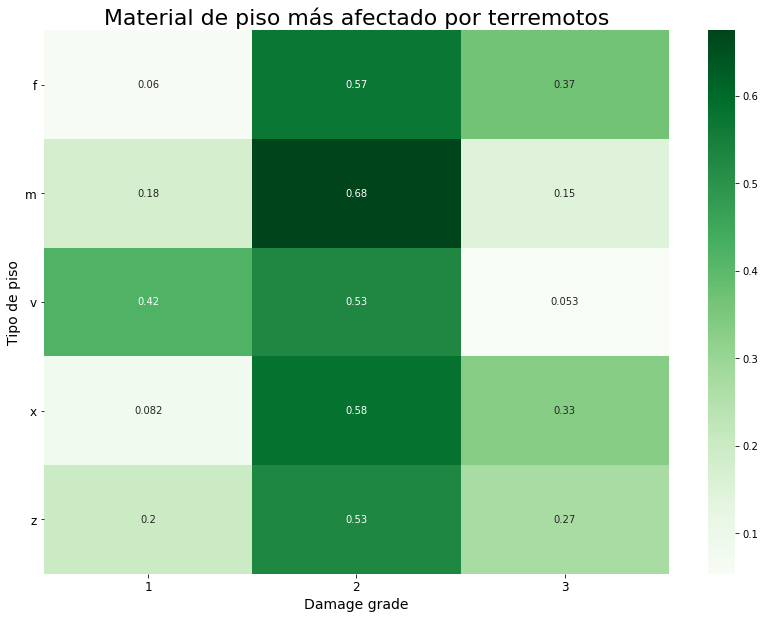

In [20]:
fig, ax = plt.subplots(figsize=(14,10)) 
p1 = sns.heatmap(ground_type,cmap='Greens',annot=True)
#annot true por defecto pone el formato en cientifico
ax.set_ylabel('Tipo de piso',fontsize=14)
ax.set_xlabel('Damage grade',fontsize=14)
ax.set_title('Material de piso más afectado por terremotos',fontsize=22)

y_labels = ground_type.index
x_labels = ground_type.columns
aux = ax.set_yticklabels(y_labels,rotation=0,fontsize=12)
aux = ax.set_xticklabels(x_labels,fontsize=12)
fig.savefig("ground_damage.png")

## ScatterPlot Matrix

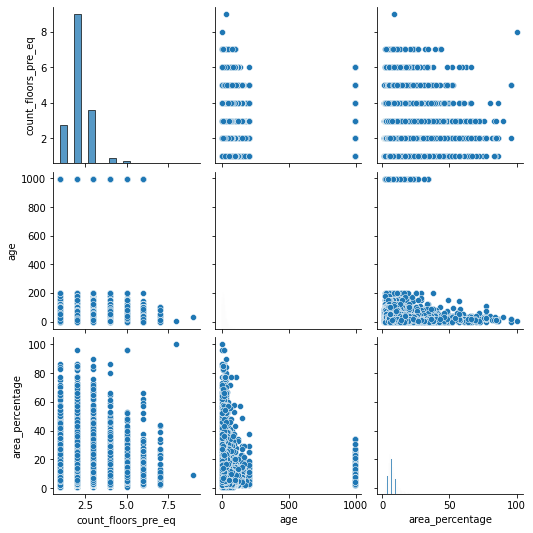

In [21]:
#esto sirve como analisis exploratorio para ver como se relacionan las variables entre si rápidamente
matrix = values.merge(labels,on='building_id',how='inner')\
.loc[:,['building_id',
 'count_floors_pre_eq',
 'age',
 'area_percentage']]\
.set_index('building_id')

p = sns.pairplot(matrix)
p.savefig("matrix_plot.png")

## Antigüedad según material

### Foundation

In [22]:
foundation_type = values.loc[:,['age','foundation_type']]
foundation_type

,age,foundation_type
0,30,r
1,10,r
2,10,r
3,10,r
4,30,r
...,...,...
260596,55,r
260597,0,r
260598,55,r
260599,10,r


Text(0.5, 1.0, 'Antigüedad segun tipo de cimiento')

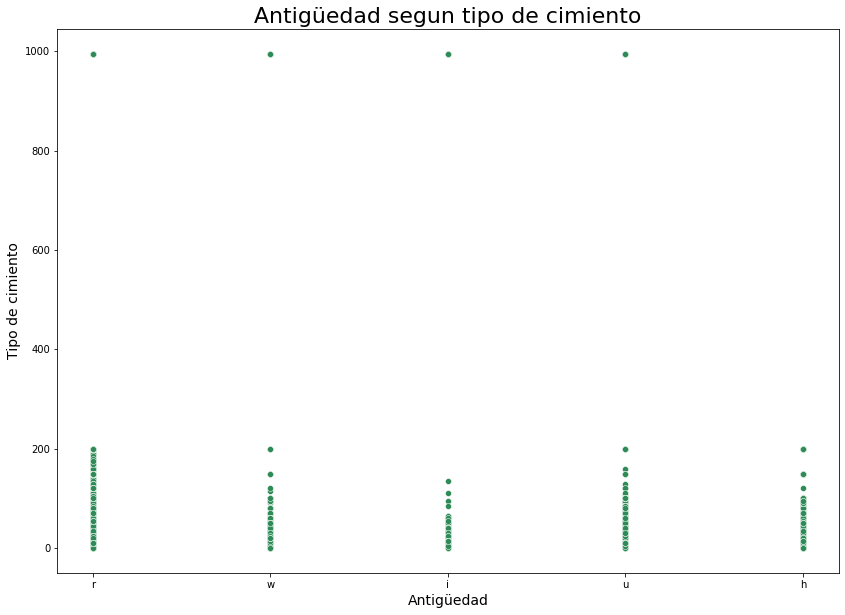

In [23]:
fig, ax = plt.subplots(figsize=(14,10)) 
p1 = sns.scatterplot(data=foundation_type, x=foundation_type.foundation_type, y=foundation_type.age,color='seagreen')
ax.set_ylabel('Tipo de cimiento',fontsize=14)
ax.set_xlabel('Antigüedad',fontsize=14)
ax.set_title('Antigüedad segun tipo de cimiento',fontsize=22)

### Roof

In [24]:
roof_type = values.loc[:,['age','roof_type']]
roof_type

,age,roof_type
0,30,n
1,10,n
2,10,n
3,10,n
4,30,n
...,...,...
260596,55,n
260597,0,n
260598,55,q
260599,10,x


Text(0.5, 1.0, 'Antigüedad segun tipo de techo')

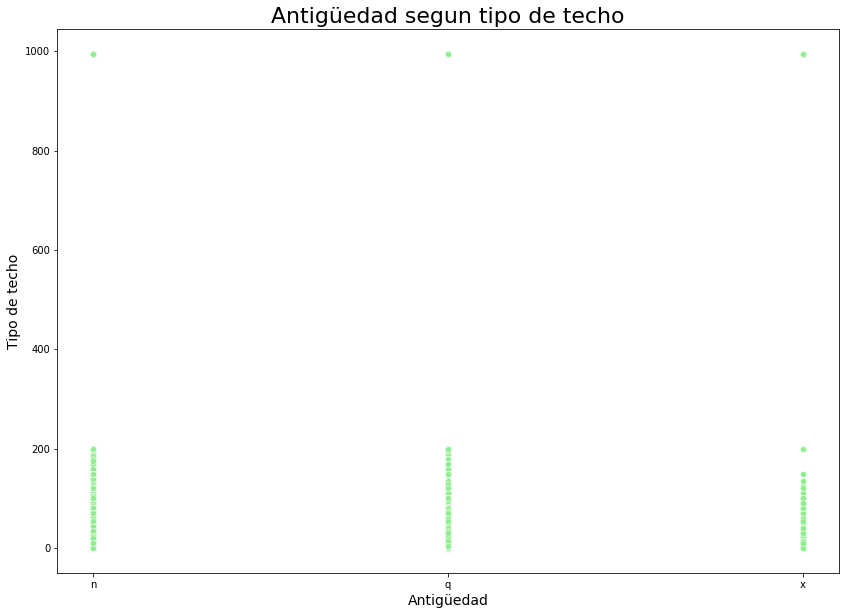

In [25]:
fig, ax = plt.subplots(figsize=(14,10)) 
p1 = sns.scatterplot(data=roof_type, x=roof_type.roof_type, y=roof_type.age,color='lightgreen')
ax.set_ylabel('Tipo de techo',fontsize=14)
ax.set_xlabel('Antigüedad',fontsize=14)
ax.set_title('Antigüedad segun tipo de techo',fontsize=22)

### Ground

In [26]:
ground_type = values.loc[:,['age','ground_floor_type']]
ground_type

,age,ground_floor_type
0,30,f
1,10,x
2,10,f
3,10,f
4,30,f
...,...,...
260596,55,f
260597,0,f
260598,55,f
260599,10,v


Text(0.5, 1.0, 'Antigüedad segun tipo de suelo')

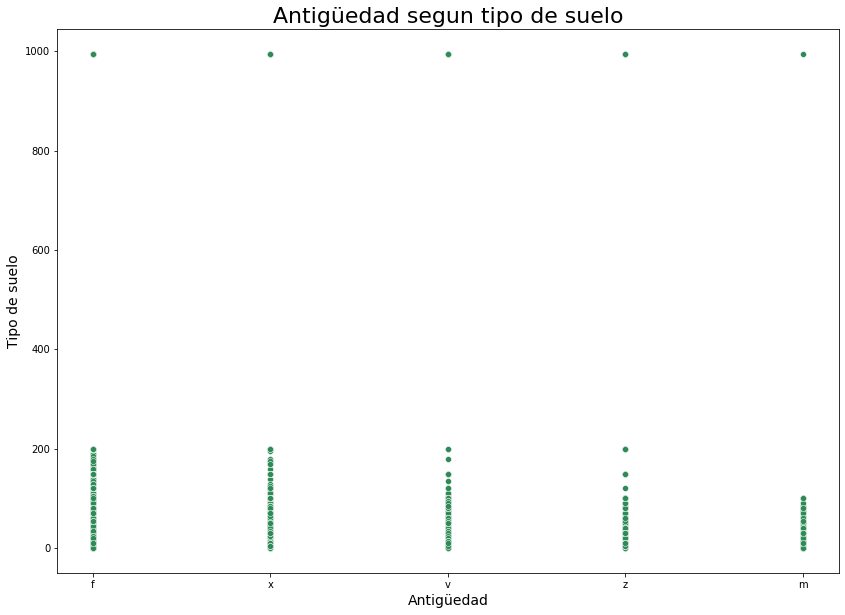

In [27]:
fig, ax = plt.subplots(figsize=(14,10)) 
p1 = sns.scatterplot(data=ground_type, x=ground_type.ground_floor_type, y=ground_type.age,color='seagreen')
ax.set_ylabel('Tipo de suelo',fontsize=14)
ax.set_xlabel('Antigüedad',fontsize=14)
ax.set_title('Antigüedad segun tipo de suelo',fontsize=22)

plt.gca().invert_yaxis()## Cantidad de daño según antigüedad

In [28]:
age_damage = values.loc[:,['building_id','age']].merge(labels,on='building_id',how='inner')
age_damage = age_damage.loc[:,['damage_grade','age']]
age_damage

,damage_grade,age
0,3,30
1,2,10
2,3,10
3,2,10
4,3,30
...,...,...
260596,2,55
260597,3,0
260598,3,55
260599,2,10


Text(0.5, 1.0, 'Tipo de daño segun Antigüedad')

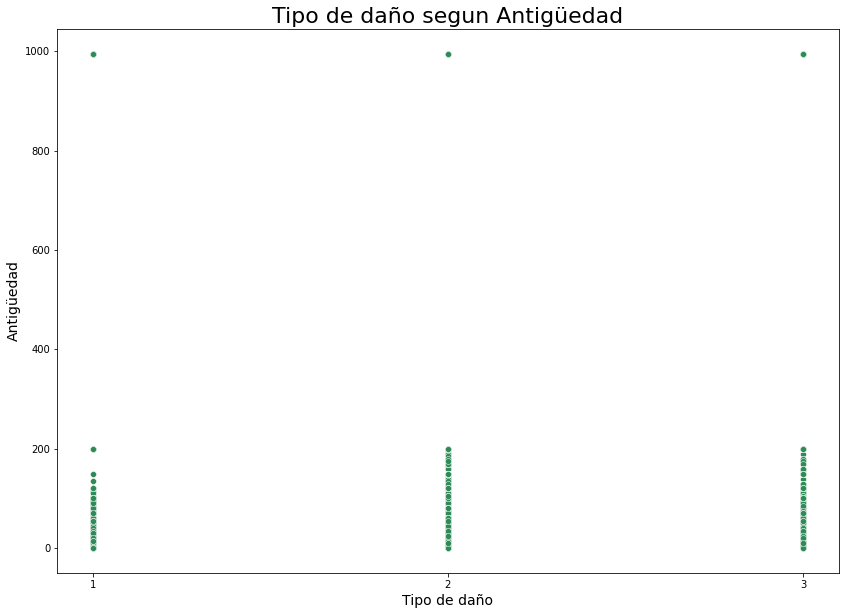

In [29]:
fig, ax = plt.subplots(figsize=(14,10)) 
p1 = sns.scatterplot(data=age_damage, x=age_damage.damage_grade, y=age_damage.age,color="seagreen")
ax.set_ylabel('Antigüedad',fontsize=14)
ax.set_xlabel('Tipo de daño',fontsize=14)
ax.set_title('Tipo de daño segun Antigüedad',fontsize=22)

## Cantidad de daño según orientación

In [41]:
orientation_damage = values.loc[:,['building_id','position']].merge(labels,on='building_id',how='inner')\
.pivot_table(index='position',columns='damage_grade',values='building_id',aggfunc='count')
for i in range (len(orientation_damage)):
    orientation_damage.iloc[i] = orientation_damage.iloc[i]/(orientation_damage.iloc[i].sum())
orientation_damage.index


Index(['j', 'o', 's', 't'], dtype='object', name='position')

In [31]:
# set width of bars
#barWidth = 0.25
 
# set heights of bars
#bars1 = orientation_damage.iloc[0]
#bars2 = orientation_damage.iloc[1]
#bars3 = orientation_damage.iloc[2]
 
# Set position of bar on X axis
#r1 = np.arange(len(bars1))
#r2 = [x + barWidth for x in r1]
#r3 = [x + barWidth for x in r2]

# Make the plotj 	o 	s 	t
#plt.bar(r1, bars1, color='#06f085', width=barWidth, edgecolor='white', label='damage 1')
#plt.bar(r2, bars2, color='#1bb96f', width=barWidth, edgecolor='white', label='damage 2')
#plt.bar(r3, bars3, color='#319165', width=barWidth, edgecolor='white', label='damage 3')

# Add xticks on the middle of the group bars
#plt.xlabel('Orientations')
#plt.xticks([r + barWidth for r in range(len(bars1))], ['j', 'o', 's', 't'])
 
# Create legend & Show graphic
#plt.legend()
#plt.show()
#fig.savefig("orientation_damage.png")

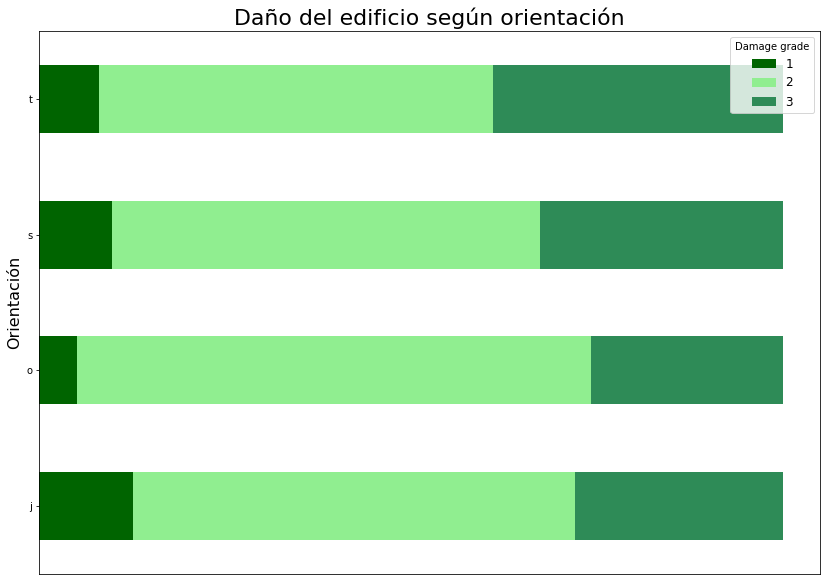

In [45]:
ax = orientation_damage.plot.barh(stacked=True,color=["darkgreen","lightgreen","seagreen"],figsize=(14,10))
ax.set_ylabel('Orientación',fontsize=16)
ax.set_title('Daño del edificio según orientación',fontsize=22)
ax.legend(loc=0,title='Damage grade',fontsize=12)

ax.axes.get_xaxis().set_visible(False)
plt.show()
fig.savefig("orientation_damage.png")

